In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [7]:
aoi=15
nFile = f'data/normalization_{aoi}deg.pkl'
tFile = f'data/transmission_{aoi}deg.pkl'
rFile = f'data/reflection_{aoi}deg.pkl'

dichroicDataFile = '../../ratdb/dichroic_data/trans_shortpass_dichroic.dat'


In [3]:
with open(nFile, 'rb') as f:
    nData = pickle.load(f)

with open(tFile, 'rb') as f:
    tData = pickle.load(f)

with open(rFile, 'rb') as f:
    rData = pickle.load(f)

with open(dichroicDataFile, 'r') as f:
    f.readline()
    wvls = np.fromstring(f.readline(), sep=' ')
    angles = np.fromstring(f.readline(), sep=' ')
    data = np.loadtxt(f)

angleIdx = np.where(angles==aoi)[0][0]


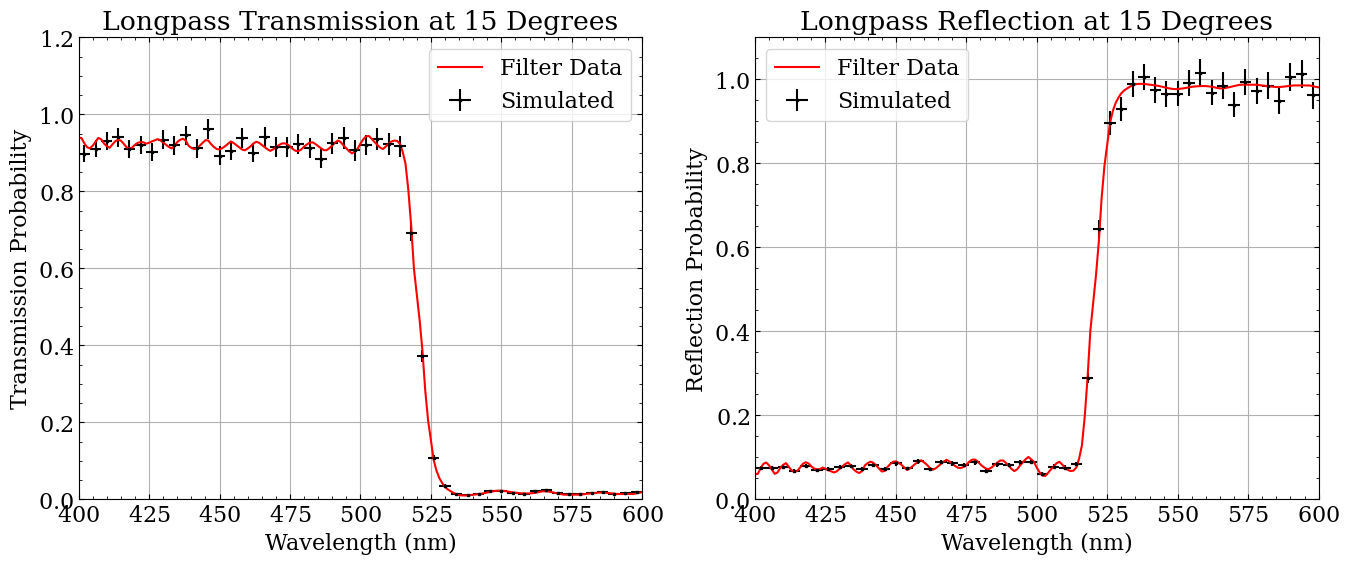

In [4]:
histOpts={
    'bins': 100,
    'range': (200, 600),
}
plt.style.use('/media/linux_store/hep/plot_style.mplstyle')
nHist, binEdges = np.histogram(nData, **histOpts)
tHist, binEdges = np.histogram(tData, **histOpts)
rHist, binEdges = np.histogram(rData, **histOpts)
binCenters = 0.5*(binEdges[:-1] + binEdges[1:])
binHalfWidth = 0.5*(binEdges[1] - binEdges[0])

tRatio = tHist / nHist
rRatio = rHist / nHist

relError_norm  = np.sqrt(nHist) / nHist
relError_tHist = np.sqrt(tHist) / tHist
relError_rHist = np.sqrt(rHist) / rHist
tRatio_error = tRatio * (relError_norm + relError_tHist)
rRatio_error = rRatio * (relError_norm + relError_rHist)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.errorbar(binCenters, tRatio, xerr=binHalfWidth, yerr=tRatio_error, fmt='ks', markersize=2, label='Simulated')
plt.plot(wvls, (data[angleIdx]/100), 'r-', label='Filter Data')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmission Probability')
plt.title(f"Longpass Transmission at {aoi} Degrees")
plt.xlim(400, 600)
plt.ylim(0, 1.2)
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.errorbar(binCenters, rRatio, xerr=binHalfWidth, yerr=rRatio_error, fmt='ks', markersize=2, label='Simulated')
plt.plot(wvls, 1-(data[angleIdx]/100), 'r-', label='Filter Data')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflection Probability')
plt.title(f"Longpass Reflection at {aoi} Degrees")
plt.xlim(400, 600)
plt.ylim(0, 1.1)
plt.grid()
plt.legend()




In [16]:
histOpts={
    'bins': 50,
    'range': (200, 600),
}
plt.style.use('/media/linux_store/hep/plot_style.mplstyle')


def generatePlots(aoi):
    # File names
    nFile = f'shortpass_data/normalization_{aoi}deg.pkl'
    tFile = f'shortpass_data/transmission_{aoi}deg.pkl'
    rFile = f'shortpass_data/reflection_{aoi}deg.pkl'

    with open(nFile, 'rb') as f:
        nData = pickle.load(f)

    with open(tFile, 'rb') as f:
        tData = pickle.load(f)

    with open(rFile, 'rb') as f:
        rData = pickle.load(f)

    with open(dichroicDataFile, 'r') as f:
        f.readline()
        wvls = np.fromstring(f.readline(), sep=' ')
        angles = np.fromstring(f.readline(), sep=' ')
        data = np.loadtxt(f)

    # Data file indexing
    angleIdx = np.where(angles==aoi)[0][0]
    nHist, binEdges = np.histogram(nData, **histOpts)
    tHist, binEdges = np.histogram(tData, **histOpts)
    rHist, binEdges = np.histogram(rData, **histOpts)
    binCenters = 0.5*(binEdges[:-1] + binEdges[1:])
    binHalfWidth = 0.5*(binEdges[1] - binEdges[0])

    tRatio = tHist / nHist
    rRatio = rHist / nHist

    relError_norm  = np.sqrt(nHist) / nHist
    relError_tHist = np.sqrt(tHist) / tHist
    relError_rHist = np.sqrt(rHist) / rHist
    tRatio_error = tRatio * (relError_norm + relError_tHist)
    rRatio_error = rRatio * (relError_norm + relError_rHist)

    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    plt.errorbar(binCenters, tRatio, xerr=binHalfWidth, yerr=tRatio_error, fmt='ks', markersize=2, label='Simulated')
    plt.plot(wvls, (data[angleIdx]/100), 'r-', label='Filter Data')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Transmission Probability')
    plt.title(f"Shortpass Transmission at {aoi} Degrees")
    plt.xlim(400, 600)
    plt.ylim(-0.05, 1.1)
    plt.grid()
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.errorbar(binCenters, rRatio, xerr=binHalfWidth, yerr=rRatio_error, fmt='ks', markersize=2, label='Simulated')
    plt.plot(wvls, 1-(data[angleIdx]/100), 'r-', label='Filter Data')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Reflection Probability')
    plt.title(f"Shortpass Reflection at {aoi} Degrees")
    plt.xlim(400, 600)
    plt.ylim(0, 1.1)
    plt.grid()
    plt.legend()
    plt.savefig(f'figures/shortpass_{aoi}deg.png')
    

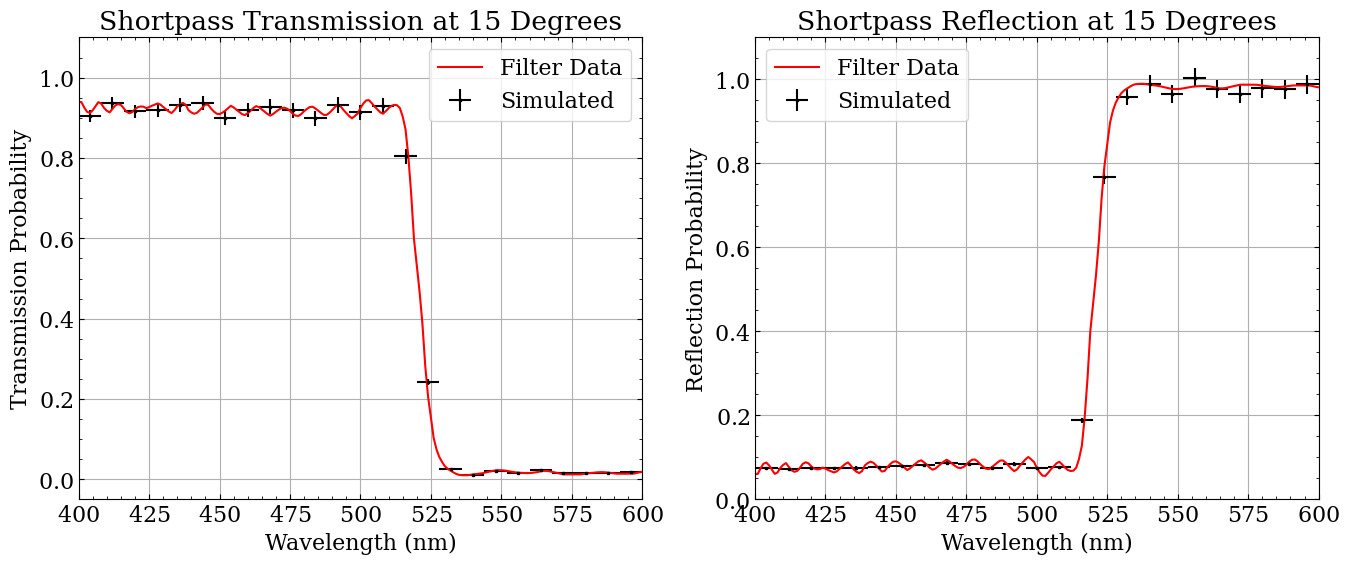

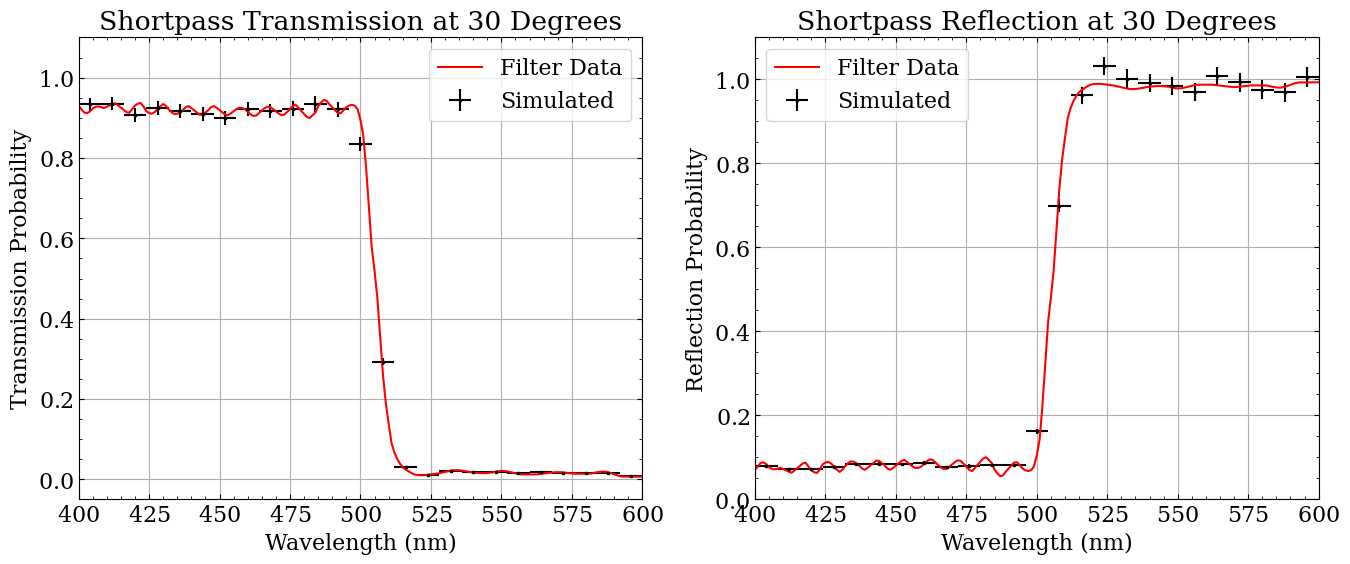

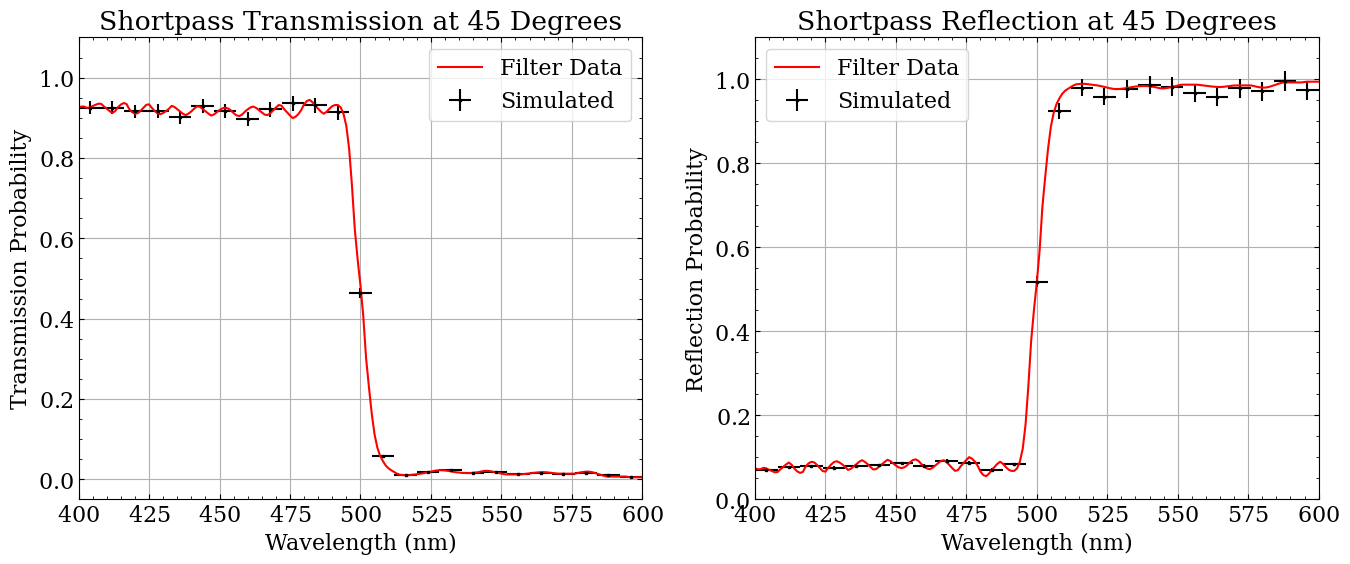

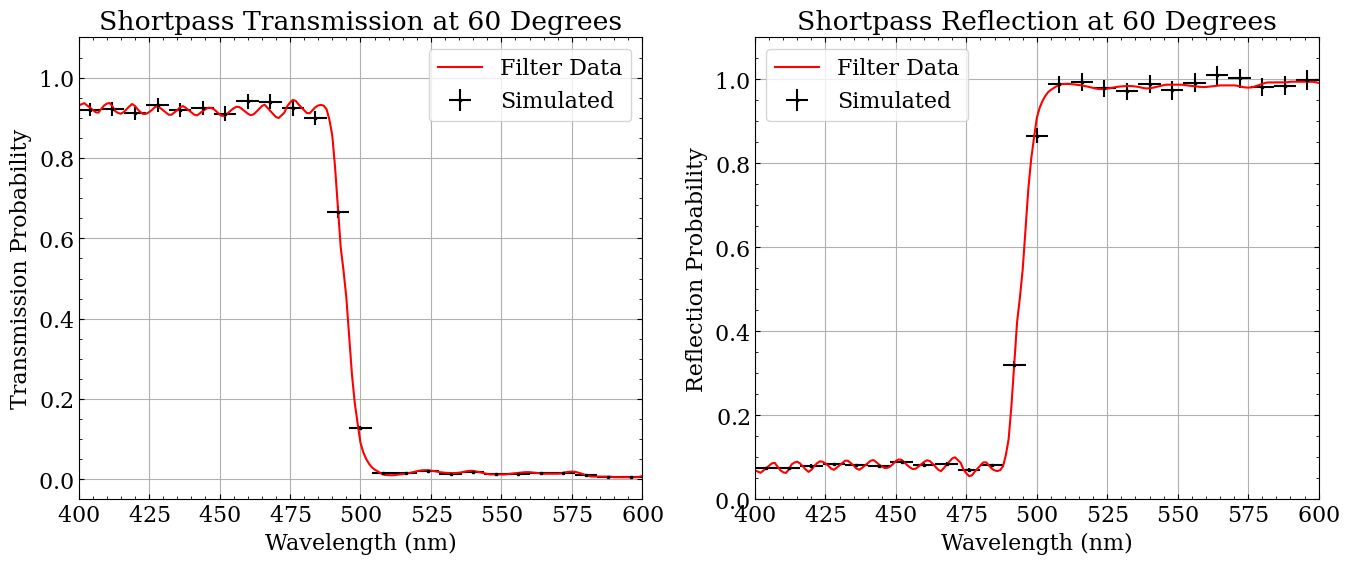

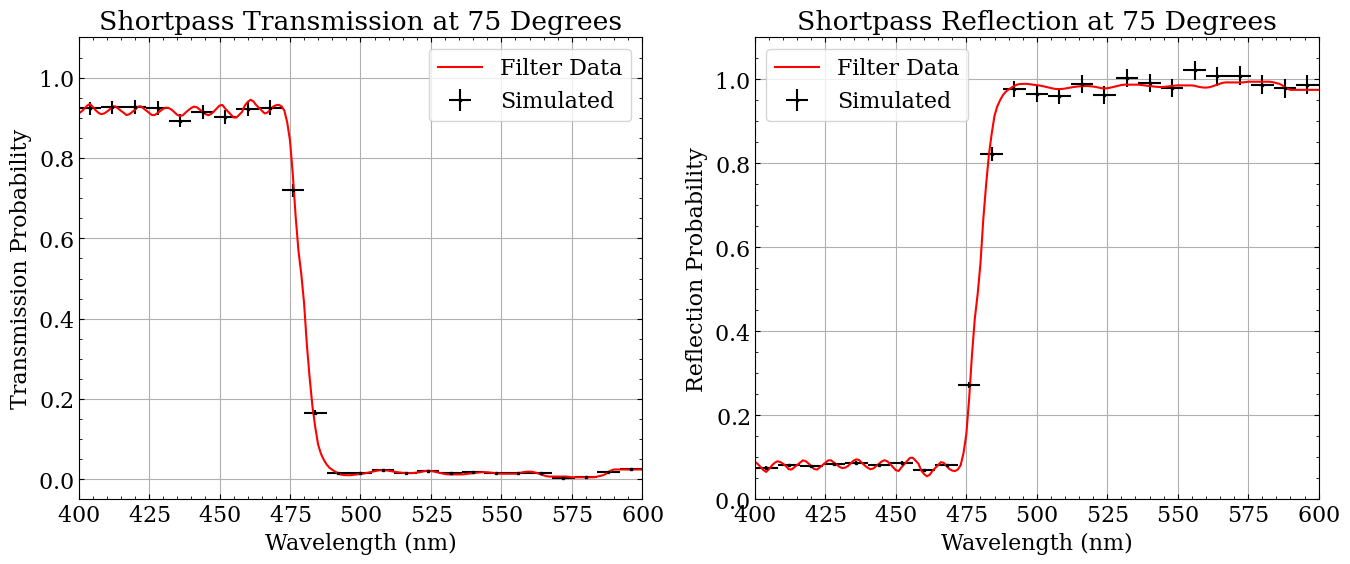

In [17]:
generatePlots(15)
generatePlots(30)
generatePlots(45)
generatePlots(60)
generatePlots(75)